In [113]:
import random
import math
from statistics import mean
import statistics
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
import pylab as pl

In [114]:
## Creates our gun
def spinRevolver():
    spin = random.randint(1,6)
    if spin == 6:
        #print(spin,'Loss')
        return False
    else:
        #print(spin, 'Win')
        return True

In [115]:
#spin tester
x = 100
while x < 100:
    result = spinRevolver()
    print(result)
    x+= 1

In [116]:
#creates the russian roulette game
def russianRoulette(gameLength):
    currentRound = 0
    x = []
    y = []
    live = 0
    #wager = initialWager
    while (currentRound <= gameLength) and (live >= 0):
        if spinRevolver():
            live = 1
            #funds += wager
        else:
            live = -1
            #funds = 0
        x.append(currentRound)
        #y.append(funds)
        currentRound += 1
    #plt.plot(x,y)
    return (currentRound)

In [117]:
# creates our simulator, visualizations, and statistics
def simRussianRoulette(playerCount,gameLength):
    x = 0
    lifeSpan = []
    while x < playerCount:
        lifeSpan.append(russianRoulette(gameLength))
        x+=1
    df = pd.DataFrame(lifeSpan)
    #plt.ylabel('Funds')
    #plt.xlabel('Game Length')
    #plt.show()
    ls = sorted(lifeSpan)
    fit = stats.norm.pdf(ls, np.mean(ls), np.std(ls))
    #mn = mean(lifeSpan)
    #std = statistics.stdev(lifeSpan)
    # Mean = 0, SD = 2.
    pl.plot(ls,fit,'-o')

    pl.hist(ls,normed=True) 
    #plt.plot(lifeSpan, norm.pdf(lifeSpan,mn,std))
    #plt.savefig('RRSim.png',dpi=800)
    pl.savefig('RRSim.png',dpi=800)
    print(df.describe())
    #print(df.describe())

How many players? (int)1000
Maximum number of rounds? (int)1000


C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


                 0
count  1000.000000
mean      6.304000
std       5.705448
min       1.000000
25%       2.000000
50%       5.000000
75%       9.000000
max      48.000000


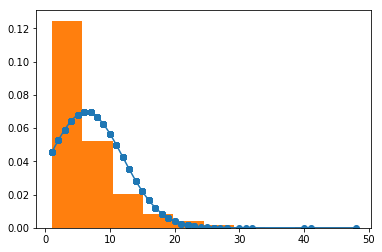

In [118]:
playerCount = input("How many players? (int)")
gameLength = input("Maximum number of rounds? (int)")
playerCount = int(playerCount)
gameLength = int(gameLength)
simRussianRoulette(playerCount,gameLength)